In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn

In [ ]:
RMoE_test = torch.load(f'/cpfs01/projects-HDD/cfff-23ba4487e9df_HDD/wangzili/zyz/CompeteSMoE/checkpoints-time/enwik8/transformers-m/test/stablemoe.pt')['model']
print(RMoE_test['module.layers.0.smoe.experts.htoh4.weight'].shape, RMoE_test['module.layers.0.smoe.experts.h4toh.weight'].shape)
# (num_experts, 4h, h) (num_experts, h, 4h)
htoh4 = RMoE_test['module.layers.0.smoe.experts.htoh4.weight']
h4toh = RMoE_test['module.layers.0.smoe.experts.h4toh.weight']
avg_key = htoh4.mean(dim=1) # (num_experts, h)
avg_value = h4toh.mean(dim=2) # (num_experts, h)
normed_key = nn.functional.normalize(avg_key, p=2, dim=1)
normed_value = nn.functional.normalize(avg_value, p=2, dim=1)
normed_avg_expert = torch.cat([normed_key, normed_value], dim=1)
avg_expert = torch.cat([avg_key, avg_value], dim=1)
# 计算 experts 间的平均相似度
similarity = torch.mm(avg_expert, avg_expert.t()) 
avg_sim = similarity.mean().item()

normed_similarity = torch.mm(normed_avg_expert, normed_avg_expert.t())
normed_avg_sim = normed_similarity.mean().item()


def get_similarities(htoh4, h4toh):
    avg_key = htoh4.mean(dim=1) # (num_experts, h)
    avg_value = h4toh.mean(dim=2) # (num_experts, h)
    normed_key = nn.functional.normalize(avg_key, p=2, dim=1)
    normed_value = nn.functional.normalize(avg_value, p=2, dim=1)
    normed_avg_expert = torch.cat([normed_key, normed_value], dim=1)
    avg_expert = torch.cat([avg_key, avg_value], dim=1)
    # 计算 experts 间的平均相似度
    similarity = torch.mm(avg_expert, avg_expert.t()) 
    avg_sim = similarity.mean().item()

    normed_similarity = torch.mm(normed_avg_expert, normed_avg_expert.t())
    normed_avg_sim = normed_similarity.mean().item()
    return avg_sim, normed_avg_sim

In [ ]:
RMoE = torch.load(f'/cpfs01/projects-HDD/cfff-23ba4487e9df_HDD/wangzili/zyz/CompeteSMoE/checkpoints-up/enwik8/transformers-s/smoe-s-rnn-{n_layer}/smoe-rnn.pt')['model']
RMoE_np = torch.load(f'/cpfs01/projects-HDD/cfff-23ba4487e9df_HDD/wangzili/zyz/CompeteSMoE/checkpoints-up/enwik8/transformers-s/smoe-s-rnn-{n_layer}-np/smoe-rnn.pt')['model']
RMoE_np_r05 = torch.load(f'/cpfs01/projects-HDD/cfff-23ba4487e9df_HDD/wangzili/zyz/CompeteSMoE/checkpoints-up/enwik8/transformers-s/smoe-s-rnn-{n_layer}-np-r0.5/smoe-rnn.pt')['model']
SMoE = torch.load(f'/cpfs01/projects-HDD/cfff-23ba4487e9df_HDD/wangzili/zyz/CompeteSMoE/checkpoints-up/enwik8/transformers-s/smoe-{n_layer}/smoe.pt')['model']

In [ ]:
RMoE_sims = [get_similarities(RMoE[f'module.layers.{i}.smoe.experts.htoh4.weight'], RMoE[f'module.layers.{i}.smoe.experts.h4toh.weight']) for i in range(n_layer)]
RMoE_normed_sim = [x[1] for x in RMoE_sims]
RMoE_avg_sim = [x[0] for x in RMoE_sims]

RMoE_np_sims = [get_similarities(RMoE_np[f'module.layers.{i}.smoe.experts.htoh4.weight'], RMoE_np[f'module.layers.{i}.smoe.experts.h4toh.weight']) for i in range(n_layer)]
RMoE_np_normed_sim = [x[1] for x in RMoE_np_sims]
RMoE_np_avg_sim = [x[0] for x in RMoE_np_sims]

RMoE_np_r05_sims = [get_similarities(RMoE_np_r05[f'module.layers.{i}.smoe.experts.htoh4.weight'], RMoE_np_r05[f'module.layers.{i}.smoe.experts.h4toh.weight']) for i in range(n_layer)]
RMoE_np_r05_normed_sim = [x[1] for x in RMoE_np_r05_sims]
RMoE_np_r05_avg_sim = [x[0] for x in RMoE_np_r05_sims]

SMoE_sims = [get_similarities(SMoE[f'module.layers.{i}.smoe.experts.htoh4.weight'], SMoE[f'module.layers.{i}.smoe.experts.h4toh.weight']) for i in range(n_layer)]
SMoE_normed_sim = [x[1] for x in SMoE_sims]
SMoE_avg_sim = [x[0] for x in SMoE_sims]

all_sim_info = {'RMoE': {'normed_sim': RMoE_normed_sim, 'avg_sim': RMoE_avg_sim},
                'RMoE_np': {'normed_sim': RMoE_np_normed_sim, 'avg_sim': RMoE_np_avg_sim},
                'RMoE_np_r05': {'normed_sim': RMoE_np_r05_normed_sim, 'avg_sim': RMoE_np_r05_avg_sim},
                'SMoE': {'normed_sim': SMoE_normed_sim, 'avg_sim': SMoE_avg_sim}}

# 保存
torch.save(all_sim_info, f'similarity_info_{n_layer}.pt')

In [ ]:
print('RMoE:', np.mean(RMoE_avg_sim), np.mean(RMoE_normed_sim))
print('RMoE_np:', np.mean(RMoE_np_avg_sim), np.mean(RMoE_np_normed_sim))
print('RMoE_np_r05:', np.mean(RMoE_np_r05_avg_sim), np.mean(RMoE_np_r05_normed_sim))
print('SMoE:', np.mean(SMoE_avg_sim), np.mean(SMoE_normed_sim))



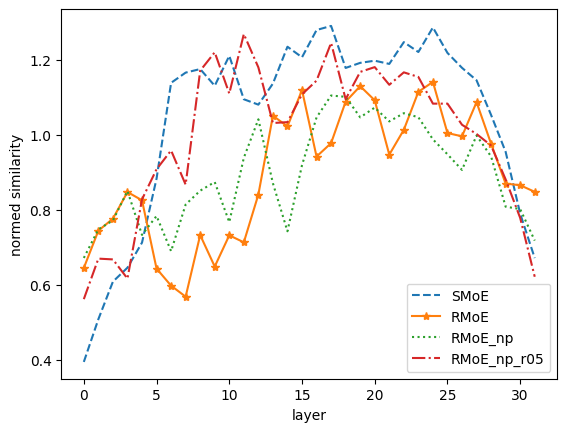

In [37]:
# plot normed similarity
n_layer = 32

sim_info = torch.load(f'similarity_info_{n_layer}.pt')
RMoE_avg_sim = sim_info['RMoE']['avg_sim']
RMoE_normed_sim = sim_info['RMoE']['normed_sim'] 
RMoE_np_avg_sim = sim_info['RMoE_np']['avg_sim']
RMoE_np_normed_sim = sim_info['RMoE_np']['normed_sim']
RMoE_np_r05_avg_sim = sim_info['RMoE_np_r05']['avg_sim']
RMoE_np_r05_normed_sim = sim_info['RMoE_np_r05']['normed_sim']
SMoE_avg_sim = sim_info['SMoE']['avg_sim']
SMoE_normed_sim = sim_info['SMoE']['normed_sim']

plt.figure()
plt.plot(range(n_layer), SMoE_normed_sim, label='SMoE', linestyle='--') #, marker='o')
plt.plot(range(n_layer), RMoE_normed_sim, label='RMoE', linestyle='-', marker='*')
plt.plot(range(n_layer), RMoE_np_normed_sim, label='RMoE_np', linestyle=':')
plt.plot(range(n_layer), RMoE_np_r05_normed_sim, label='RMoE_np_r05', linestyle='-.')

plt.xlabel('layer')
plt.ylabel('normed similarity')
plt.legend()
plt.savefig(f'normed_similarity_{n_layer}.pdf', bbox_inches='tight', pad_inches=0.1)

In [ ]:
RMoE = torch.load(f'checkpoints/enwik8/transformers-m/smoe-rnn-bal/smoe-rnn-bal.pt')['model']
SMoE = torch.load(f'checkpoints/enwik8/transformers-m/smoe-bal/smoe-bal.pt')['model']
XMoE = torch.load("checkpoints/enwik8/transformers-m/xmoe-new-gate16/xmoe-new-gate16.pt")['model']
StableMoE = torch.load("checkpoints/enwik8/transformers-m/stablemoe/stablemoe.pt")['model']
RandomMoE = torch.load("checkpoints/enwik8/transformers-m/smoe_dropout/smoe-dropout.pt")['model']
HyperMoE = torch.load("checkpoints/enwik8/transformers-m/hyper/hyper.pt")['model']

In [ ]:
RMoE_sims = [get_similarities(RMoE[f'module.layers.{i}.smoe.experts.htoh4.weight'], RMoE[f'module.layers.{i}.smoe.experts.h4toh.weight']) for i in range(n_layer)]
RMoE_normed_sim = [x[1] for x in RMoE_sims]
RMoE_avg_sim = [x[0] for x in RMoE_sims]

SMoE_sims = [get_similarities(SMoE[f'module.layers.{i}.smoe.experts.htoh4.weight'], SMoE[f'module.layers.{i}.smoe.experts.h4toh.weight']) for i in range(n_layer)]
SMoE_normed_sim = [x[1] for x in SMoE_sims]
SMoE_avg_sim = [x[0] for x in SMoE_sims]

XMoE_sims = [get_similarities(XMoE[f'module.layers.{i}.smoe.experts.htoh4.weight'], XMoE[f'module.layers.{i}.smoe.experts.h4toh.weight']) for i in range(n_layer)]
XMoE_normed_sim = [x[1] for x in XMoE_sims]
XMoE_avg_sim = [x[0] for x in XMoE_sims]

HyperMoE_sims = [get_similarities(HyperMoE[f'module.layers.{i}.smoe.experts.htoh4.weight'], HyperMoE[f'module.layers.{i}.smoe.experts.h4toh.weight']) for i in range(n_layer)]
HyperMoE_normed_sim = [x[1] for x in HyperMoE_sims]
HyperMoE_avg_sim = [x[0] for x in HyperMoE_sims]

StableMoE_sims = [get_similarities(StableMoE[f'module.layers.{i}.smoe.experts.htoh4.weight'], StableMoE[f'module.layers.{i}.smoe.experts.h4toh.weight']) for i in range(n_layer)]
StableMoE_normed_sim = [x[1] for x in StableMoE_sims]
StableMoE_avg_sim = [x[0] for x in StableMoE_sims]

RandomMoE_sims = [get_similarities(RandomMoE[f'module.layers.{i}.smoe.experts.htoh4.weight'], RandomMoE[f'module.layers.{i}.smoe.experts.h4toh.weight']) for i in range(n_layer)]
RandomMoE_normed_sim = [x[1] for x in RandomMoE_sims]
RandomMoE_avg_sim = [x[0] for x in RandomMoE_sims]

all_sim_info = {'RMoE': {'normed_sim': RMoE_normed_sim, 'avg_sim': RMoE_avg_sim},
                'SMoE': {'normed_sim': SMoE_normed_sim, 'avg_sim': SMoE_avg_sim},
                'XMoE': {'normed_sim': XMoE_normed_sim, 'avg_sim': XMoE_avg_sim},
                'HyperMoE': {'normed_sim': HyperMoE_normed_sim, 'avg_sim': HyperMoE_avg_sim},
                'StableMoE': {'normed_sim': StableMoE_normed_sim, 'avg_sim': StableMoE_avg_sim},
                'RandomMoE': {'normed_sim': RandomMoE_normed_sim, 'avg_sim': RandomMoE_avg_sim}}



In [12]:
all_sim_info = torch.load('./similarity_info_baselines.pt')

In [8]:
all_sim_info.keys()

dict_keys(['RMoE', 'SMoE', 'XMoE', 'XMoE_rnn', 'HyperMoE', 'StableMoE', 'RandomMoE'])

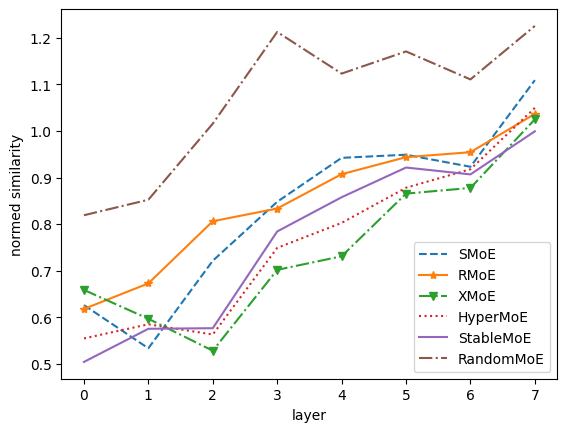

In [39]:
n_layer = 8
RMoE_avg_sim = all_sim_info['RMoE']['avg_sim']
RMoE_normed_sim = all_sim_info['RMoE']['normed_sim']
SMoE_avg_sim = all_sim_info['SMoE']['avg_sim']
SMoE_normed_sim = all_sim_info['SMoE']['normed_sim']
# SMoE_normed_sim = [x + 0.1 for x in SMoE_normed_sim]
XMoE_avg_sim = all_sim_info['XMoE']['avg_sim']
XMoE_normed_sim = all_sim_info['XMoE']['normed_sim']
HyperMoE_avg_sim = all_sim_info['HyperMoE']['avg_sim']
HyperMoE_normed_sim = all_sim_info['HyperMoE']['normed_sim']
StableMoE_avg_sim = all_sim_info['StableMoE']['avg_sim']
StableMoE_normed_sim = all_sim_info['StableMoE']['normed_sim']
RandomMoE_avg_sim = all_sim_info['RandomMoE']['avg_sim']
RandomMoE_normed_sim = all_sim_info['RandomMoE']['normed_sim']
# XMoE_rnn_avg_sim = all_sim_info['XMoE_rnn']['avg_sim']
# XMoE_rnn_normed_sim = all_sim_info['XMoE_rnn']['normed_sim']

# plot normed similarity
plt.figure()
plt.plot(range(n_layer), SMoE_normed_sim, label='SMoE', linestyle='--') #, marker='o')
plt.plot(range(n_layer), RMoE_normed_sim, label='RMoE', linestyle='-', marker='*')
plt.plot(range(n_layer), XMoE_normed_sim, label='XMoE', linestyle='-.', marker='v')
# plt.plot(range(n_layer), HyperMoE_normed_sim, label='XMoE_R', linestyle=':', marker='^')
plt.plot(range(n_layer), HyperMoE_normed_sim, label='HyperMoE', linestyle=':')
plt.plot(range(n_layer), StableMoE_normed_sim, label='StableMoE', linestyle='-')
plt.plot(range(n_layer), RandomMoE_normed_sim, label='RandomMoE', linestyle='-.')
plt.xlabel('layer')
plt.ylabel('normed similarity')
plt.legend()
plt.savefig(f'normed_similarity_baselines_{n_layer}.pdf', bbox_inches='tight', pad_inches=0.1)

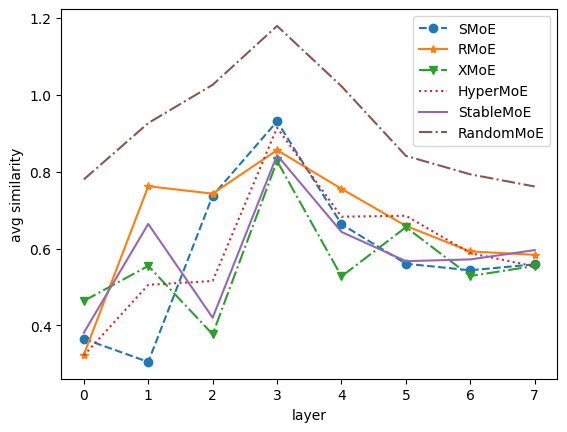

In [14]:
# plot avg similarity
plt.figure()
plt.plot(range(n_layer), SMoE_avg_sim, label='SMoE', linestyle='--', marker='o')
plt.plot(range(n_layer), RMoE_avg_sim, label='RMoE', linestyle='-', marker='*')
plt.plot(range(n_layer), XMoE_avg_sim, label='XMoE', linestyle='-.', marker='v')
plt.plot(range(n_layer), HyperMoE_avg_sim, label='HyperMoE', linestyle=':')
plt.plot(range(n_layer), StableMoE_avg_sim, label='StableMoE', linestyle='-')
plt.plot(range(n_layer), RandomMoE_avg_sim, label='RandomMoE', linestyle='-.')
plt.xlabel('layer')
plt.ylabel('avg similarity')
plt.legend()
plt.savefig(f'avg_similarity_baselines_{n_layer}.pdf', bbox_inches='tight', pad_inches=0.1)


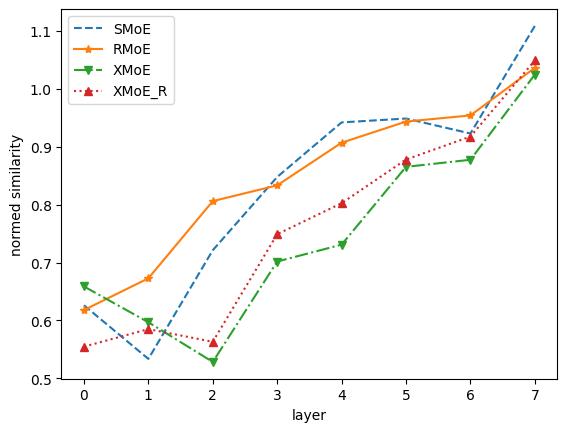

In [40]:
n_layer = 8
RMoE_avg_sim = all_sim_info['RMoE']['avg_sim']
RMoE_normed_sim = all_sim_info['RMoE']['normed_sim']
SMoE_avg_sim = all_sim_info['SMoE']['avg_sim']
SMoE_normed_sim = all_sim_info['SMoE']['normed_sim']
# SMoE_normed_sim = [x + 0.1 for x in SMoE_normed_sim]
XMoE_avg_sim = all_sim_info['XMoE']['avg_sim']
XMoE_normed_sim = all_sim_info['XMoE']['normed_sim']
# HyperMoE_avg_sim = all_sim_info['HyperMoE']['avg_sim']
# HyperMoE_normed_sim = all_sim_info['HyperMoE']['normed_sim']
# StableMoE_avg_sim = all_sim_info['StableMoE']['avg_sim']
# StableMoE_normed_sim = all_sim_info['StableMoE']['normed_sim']
# RandomMoE_avg_sim = all_sim_info['RandomMoE']['avg_sim']
# RandomMoE_normed_sim = all_sim_info['RandomMoE']['normed_sim']
XMoE_rnn_avg_sim = all_sim_info['XMoE_rnn']['avg_sim']
XMoE_rnn_normed_sim = all_sim_info['XMoE_rnn']['normed_sim']

# plot normed similarity
plt.figure()
plt.plot(range(n_layer), SMoE_normed_sim, label='SMoE', linestyle='--') #, marker='o')
plt.plot(range(n_layer), RMoE_normed_sim, label='RMoE', linestyle='-', marker='*')
plt.plot(range(n_layer), XMoE_normed_sim, label='XMoE', linestyle='-.', marker='v')
plt.plot(range(n_layer), HyperMoE_normed_sim, label='XMoE_R', linestyle=':', marker='^')
# plt.plot(range(n_layer), HyperMoE_normed_sim, label='HyperMoE', linestyle=':')
# plt.plot(range(n_layer), StableMoE_normed_sim, label='StableMoE', linestyle='-')
# plt.plot(range(n_layer), RandomMoE_normed_sim, label='RandomMoE', linestyle='-.')
plt.xlabel('layer')
plt.ylabel('normed similarity')
plt.legend()
plt.savefig(f'normed_similarity_compare4_{n_layer}.pdf', bbox_inches='tight', pad_inches=0.1)

In [ ]:
# megatron models

